# Proyecto completo de Machine Learning - Inversiones Inmobiliarias

La empresa **Alan Turing Real State** nos ha contratado para construir un modelo de precios de las viviendas de California.

Este modelo debe predecir el precio medio de las viviendas de un distrito en función de los datos que tenemos de él.

La finalidad es encontrar oportunidades de inversión.

<img width="500px" src="https://drive.google.com/uc?id=1kaKysFVpPmZmDeHT1vlUhkxqe5XZmcVj">

Vamos a tener los siguientes datos sobre los distritos:

* Longitud.
* Latitud.
* Edad media de los inmuebles.
* Superficie total.
* Total de habitaciones.
* Total de dormitorios.
* Población.
* Número de viviendas.
* Media de ingresos.
* Proximidad a la costa.
* **Precio.**

Los datos están etiquetados y queremos saber un valor concreto, por tanto, se trata de un sistema **supervisado**.

Vamos a predecir un valor, por tanto, estamos ante un problema de **regresión**, en concreto de **regresión múltiple**, ya que tenemos muchas características para la predicción.

En un problema de regresión hay varias medidas que pueden dar el rendimiento. Nosotros vamos a usar la **raiz del error cuadrático medio**, en inglés, **Root Mean Square Error (RMSE)**.



$RMSE(X, h)=\sqrt{\frac{1}{m}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2}$

$m$ es el número de instancias (casos).

$x^{(i)}$ es el vector de todas las características (sin incluir la etiqueta) de la $i$-ésima instancia del dataset.

$y^{(i)}$ es la salida deseada para esa instancia.

Por ejemplo, si un distrito del dataset está localizado en una longitud -18.29º, una latitud de 33.91º, tiene 1416 habitantes con una media de ingresos de 38372 dólares y el valor medio de la vivienda es de 156400 dólares (ignoramos otras características de momento), entonces:

$x^{(1)}=\begin{pmatrix}-18,29 \\ 33.91 \\ 1416 \\ 38372\end{pmatrix}$

$y^{(1)}=156400$

$X=\begin{pmatrix}-18,29 & 33.91 & 1416 & 38372 \\ ... & ... & ... & ...\\ ... & ... & ... & ... \end{pmatrix}$

$h$ es la función de predicción, también llamada hipótesis.

Cuando al sistema se le dan las características de una instancia $x^{(i)}$, su salida predice un valor $\hat{y}^{(i)}=h(x^{(i)})$

Por ejemplo, si el sistema predice que el precio medio de la vivienda para el primer distrito (primera fila) es de 158400 dólares, entonces $\hat{y}^{(1)}=h(x^{(1)})=158400$

El error (absoluto) de predicción para este distrito es de $\hat{y}^{(1)} - y{(1)} = 158400 - 156400 = 2000$

## Obtención de los datos

Los datos están contenidos en el fichero `housing.csv`.

Importamos NumPy, Pandas, Matplotlib y Seaborn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los datos en un Dataframe de Pandas.

In [ ]:
housing_df = pd.read_csv("/content/housing.csv")

## Exploración y visualización de los datos

In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


El atributo `total_bedrooms` presenta muchos valores nulos.

El atributo `ocean_proximity` es el único que no es de tipo `float`. Se trata de una cadena de caracteres.

Veamos los diferentes valores que puede tener `ocean_proximity`.

In [ ]:
housing_df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

¿Cuántos casos hay de cada tipo? es decir ¿Cuántos tienen el valor `NEAR BAY`, cuántos `<1H OCEAN`, etc?

In [ ]:
housing_df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


Mostrar esta tabla enterior en un gráfico de barras horizontal.

<Axes: ylabel='ocean_proximity'>

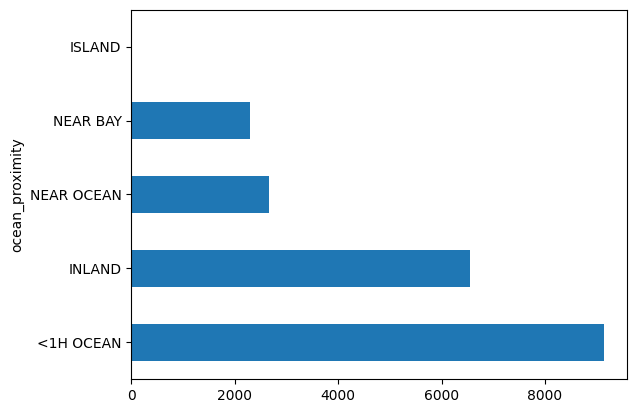

In [ ]:
housing_df["ocean_proximity"].value_counts().plot(kind="barh")

[Text(0, 0, '9136'),
 Text(0, 0, '6551'),
 Text(0, 0, '2658'),
 Text(0, 0, '2290'),
 Text(0, 0, '5')]

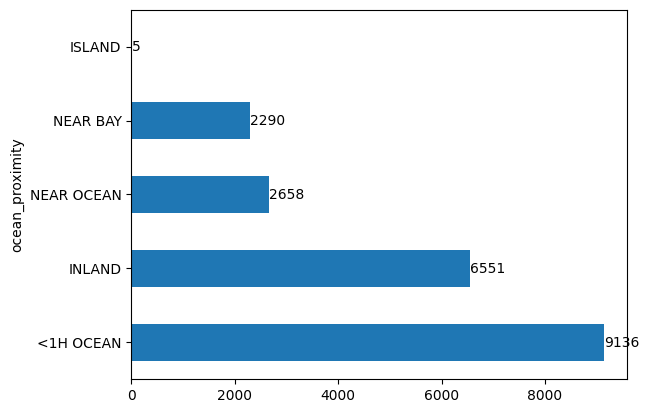

In [ ]:
df_ocean_proximity = housing_df["ocean_proximity"].value_counts()

ax = df_ocean_proximity.plot.barh()
ax.bar_label(ax.containers[0])

Media, máximo, mínimo, percentiles, etc.

In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


El 25% de los distritos tiene una media de edad inferior a 18 años.

¿Cuál es el precio medio del distrito más caro? -> 500001 dólares. Investigando sobre el dataset, hemos averiguado que se han topado a propósito los distritos con una media de precio de más de medio millón.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

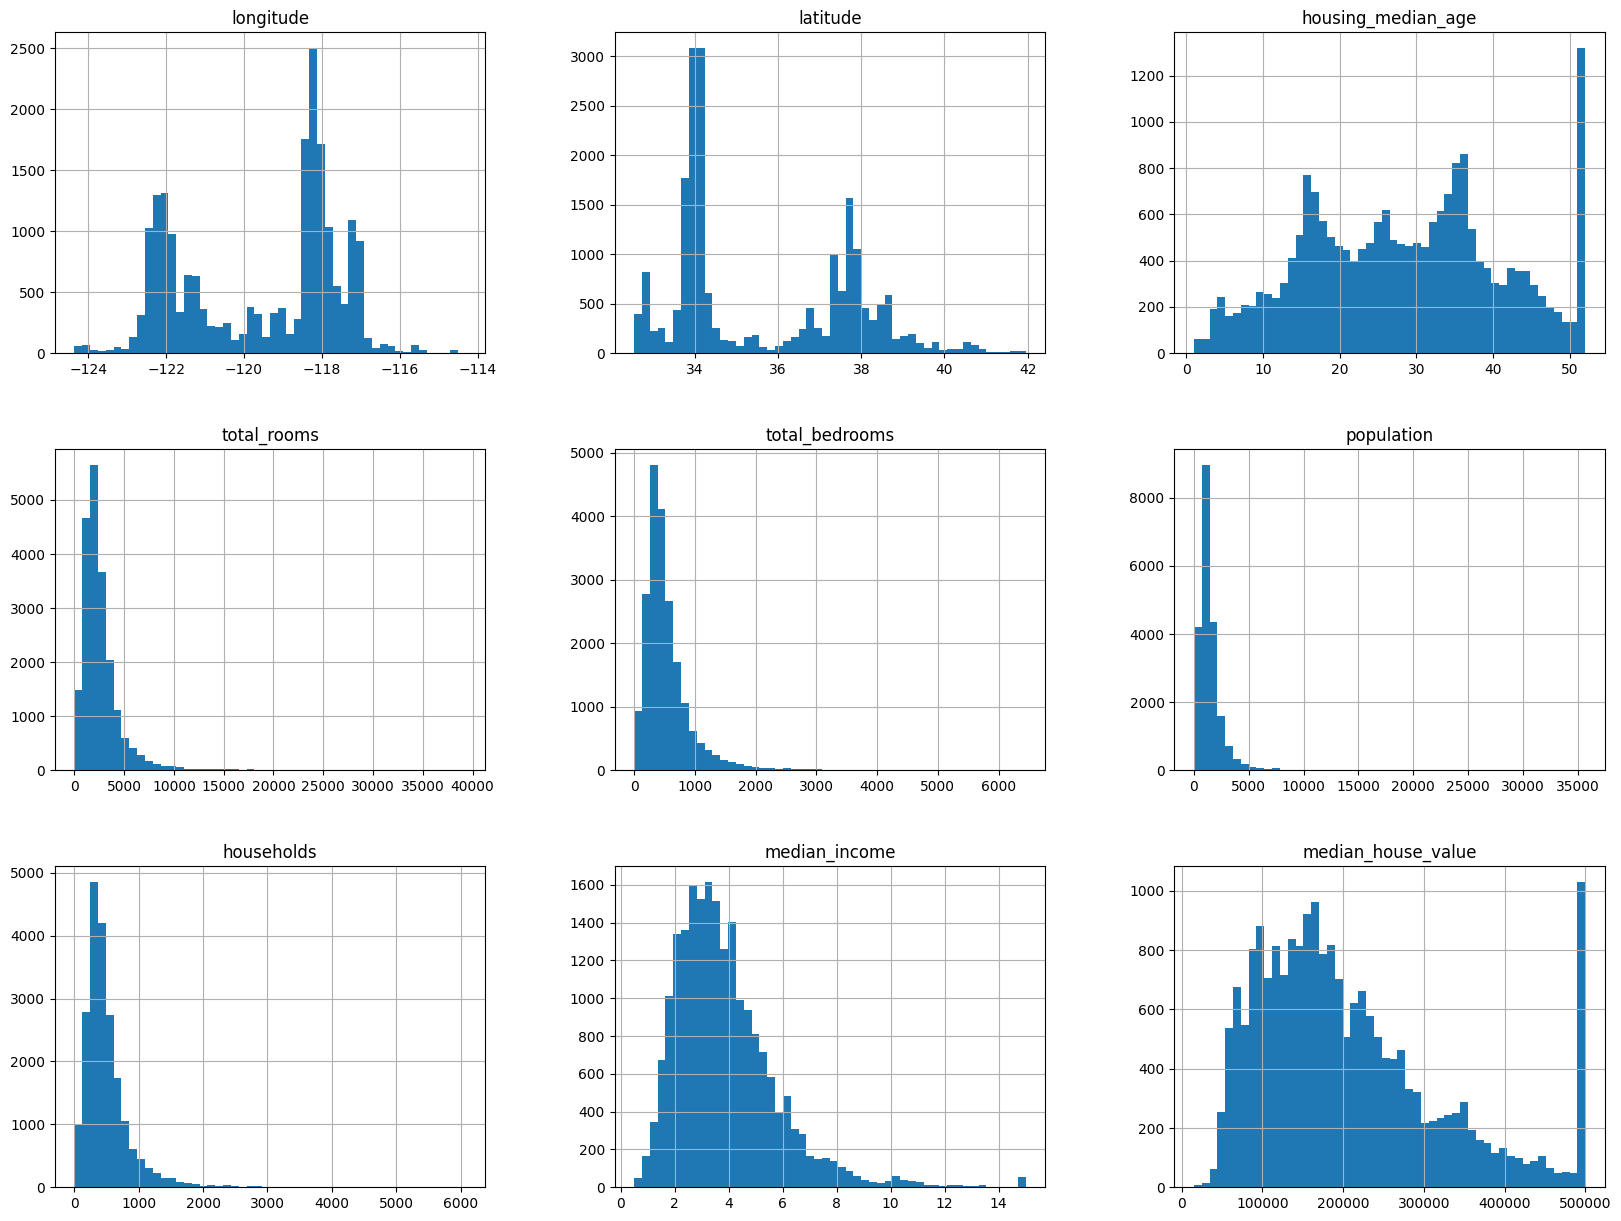

In [ ]:
housing_df.hist(bins=50, figsize=(20, 15))

¿Qué podemos observar en los histogramas?

1. La media de edad y el precio están limitados.
2. Varios histogramas tienen una cola alargada (se extienden mucho más a la derecha de la media que a la izquierda)
3. Los atriutos tienen escalas muy diferentes.
4. Los ingresos no parecen estar indicados en dólares. Después de hablar con el equipo que recopiló los datos, ha sido escalado y limitado a 15 para los ingresos más altos y a 0.5 para los más bajos.

## Datos geográficos

<Axes: xlabel='longitude', ylabel='latitude'>

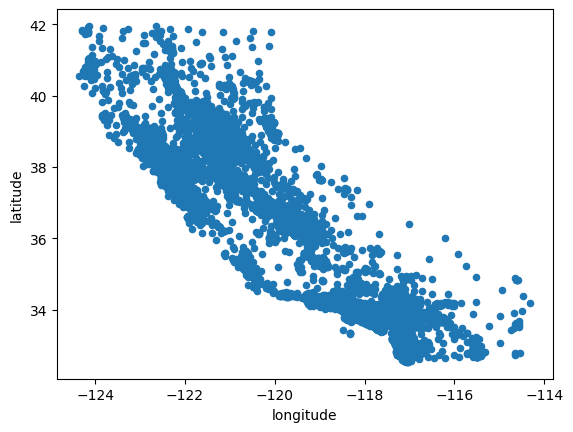

In [ ]:
housing_df.plot(kind="scatter", x="longitude", y="latitude")

Con puntos transparentes se pueden apreciar zonas con diferente densidad.

<Axes: xlabel='longitude', ylabel='latitude'>

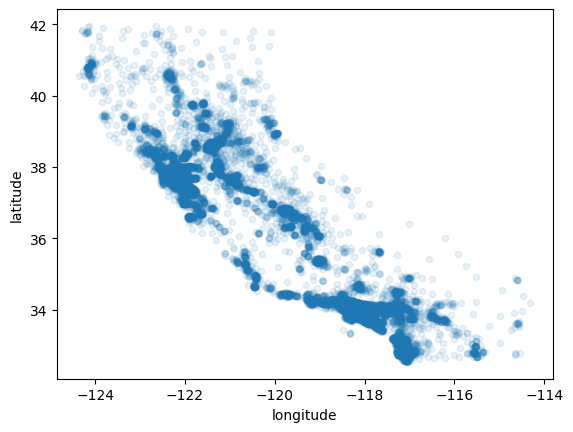

In [ ]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Vamos a representar la población del distrito mediante el radio de cada círculo, mientras que para representar el precio medio de la vivienda usaremos el color.

<Axes: xlabel='longitude', ylabel='latitude'>

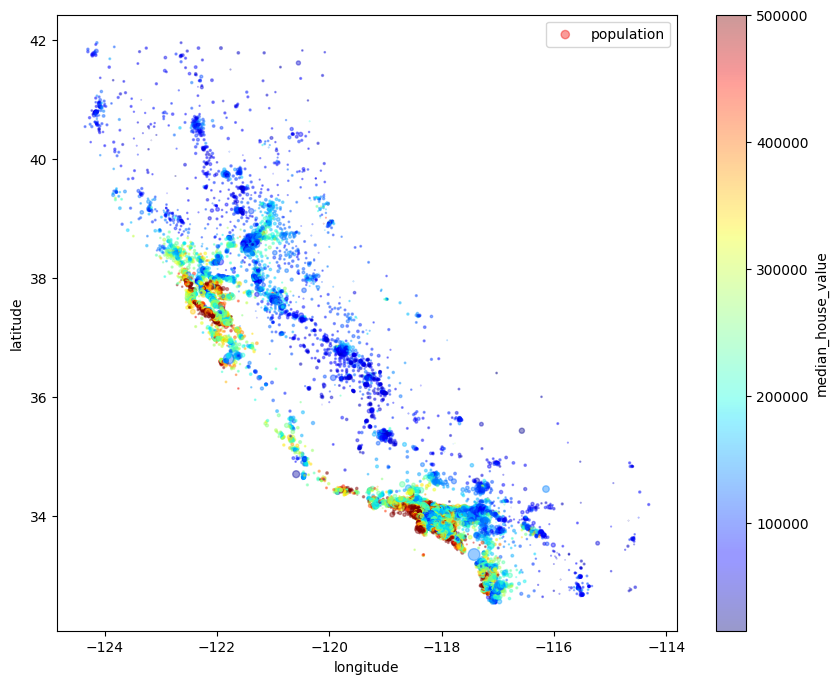

In [ ]:
housing_df.plot(kind="scatter",
                x="longitude",
                y="latitude",
                alpha=0.4, # Opacidad de los circulos
                s=housing_df["population"] / 500, # Radio de los circulos
                label="population",
                figsize=(10, 8), # Tamaño del trazado
                c="median_house_value", # Barra lateral, según el color indica un valor de cada circulo
                cmap="jet", # Cambiar los colores de la barra lateral
                colorbar=True # En caso de que fuese necesario, imprimir la barra lateral (por defecto esta en True)
                )

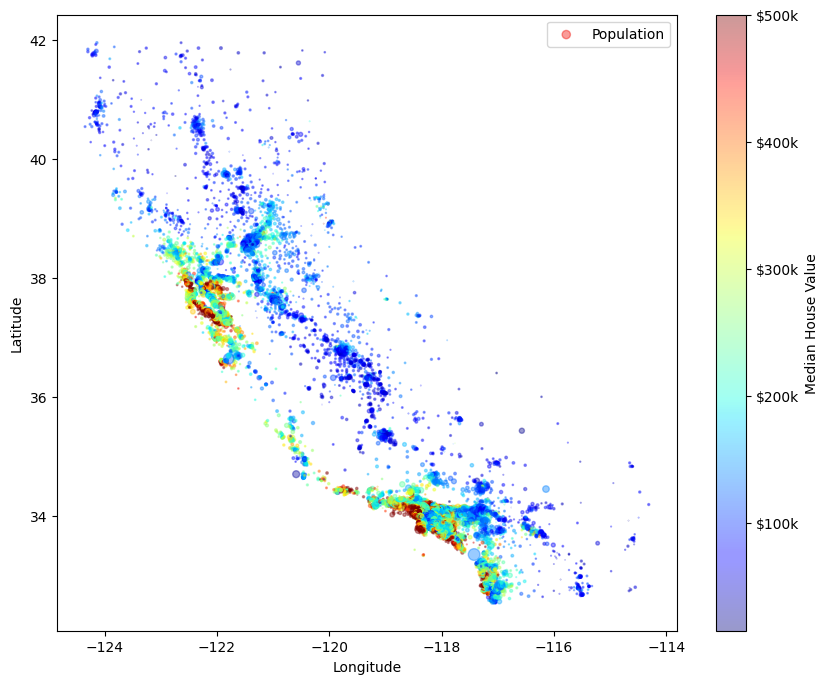

In [ ]:
import matplotlib.ticker as ticker

# housing_df.plot(kind="scatter",
#                 x="longitude",
#                 y="latitude",
#                 alpha=0.4,
#                 s=housing_df["population"] / 500,
#                 label="population",
#                 figsize=(10, 8),
#                 c="median_house_value",
#                 cmap="jet",
#                 colorbar=True
#                 )

plt.figure(figsize=(10, 8))

graphic = plt.scatter(x = housing_df["longitude"],
                      y=housing_df["latitude"],
                      alpha=0.4,
                      s=housing_df["population"] / 500,
                      label="Population",
                      c=housing_df["median_house_value"],
                      cmap="jet")

# Añadir nombres a los ejes
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Añadir la barra de colores formateada
color_bar = plt.colorbar(graphic)
color_bar.set_label("Median House Value")

color_bar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda value, _: "${}k".format(int(value / 1000)))) # El valor ´_´ es la posición

# Mostrar la leyenda
plt.legend()

plt.show()

### Correlaciones

In [ ]:
# Matriz de correlaciones

housing_sin_ocean_proximity_df = housing_df.drop("ocean_proximity", axis=1) # Con 1 indicamos la columna entera, no una fila

corr_matrix = housing_sin_ocean_proximity_df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


Detectamos una alta correlación entre el número total de habitaciones y el número de dormitorios.

Hay también una correlación significativa entre los ingresos y el valor medio de la vivienda.

In [ ]:
# Relación de cada uno de los atributos con el precio medio de la vivienda

corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


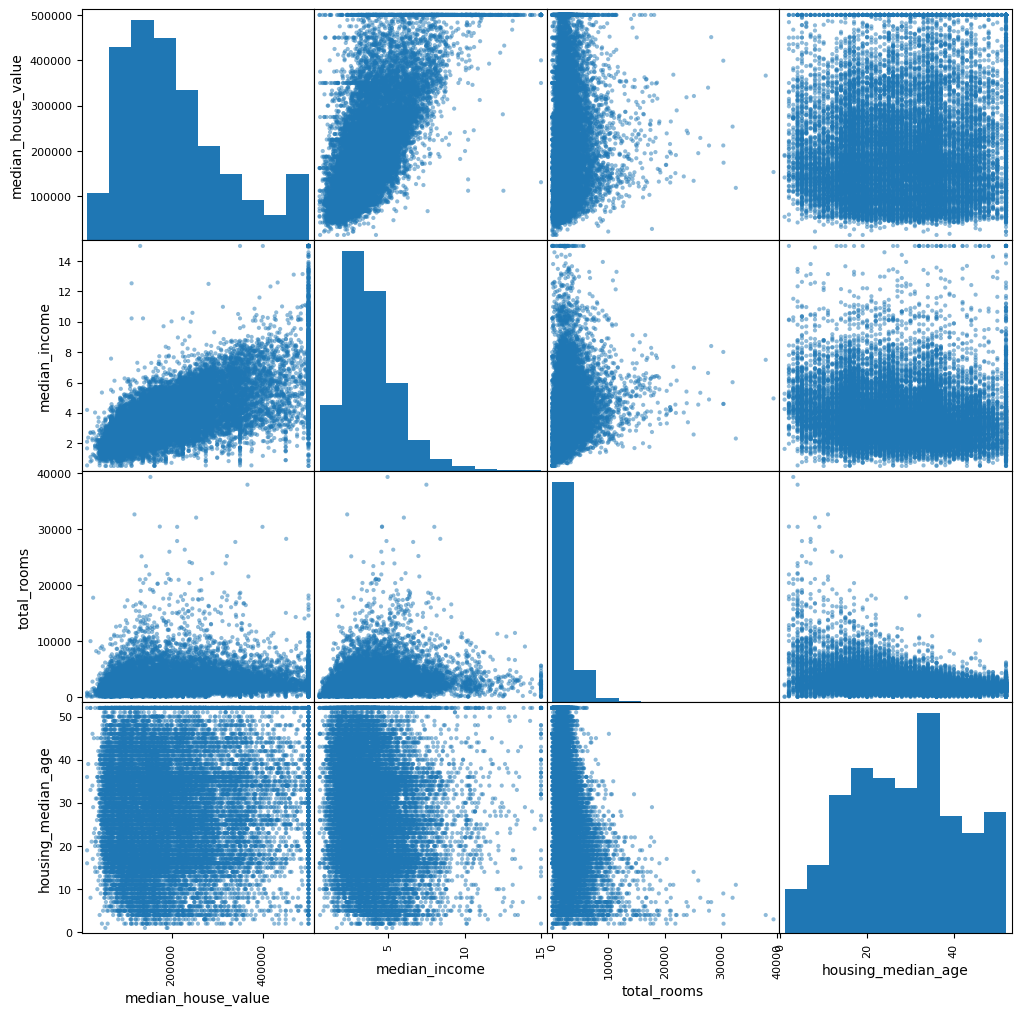

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_df[attributes], figsize=(12, 12))
plt.show()

En las diagonales, en lugar de que aparezca una línea recta de la forma $y=x$que no sería muy útil, se muestra el histograma del atributo.

Se ve claramente la correlación entre `median_house_value` y `median_income`.

Vamos a mostrar esa gráfica por separado.

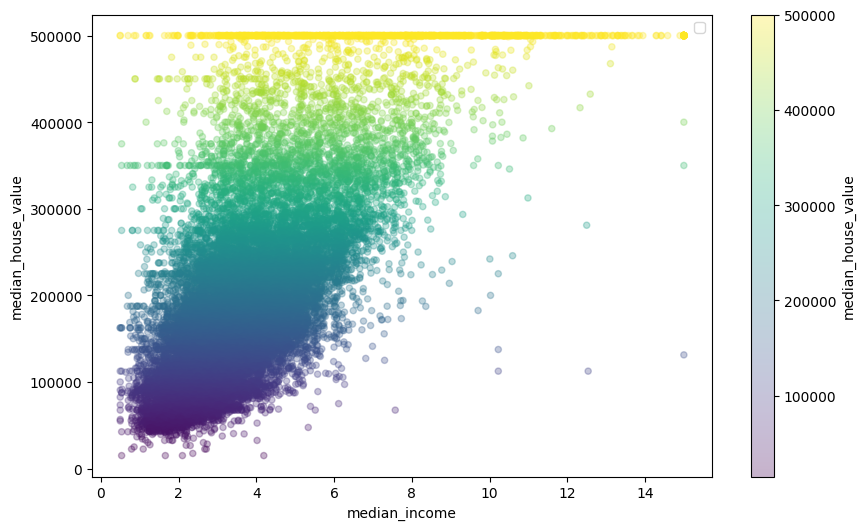

In [ ]:
housing_df.plot(kind="scatter",
                x="median_income",
                y="median_house_value",
                alpha=0.3,
                figsize=(10, 6),
                c="median_house_value")

plt.legend()
plt.show()

Para ver las relaciones entre los atributos, podemos usar también un mapa de calor.

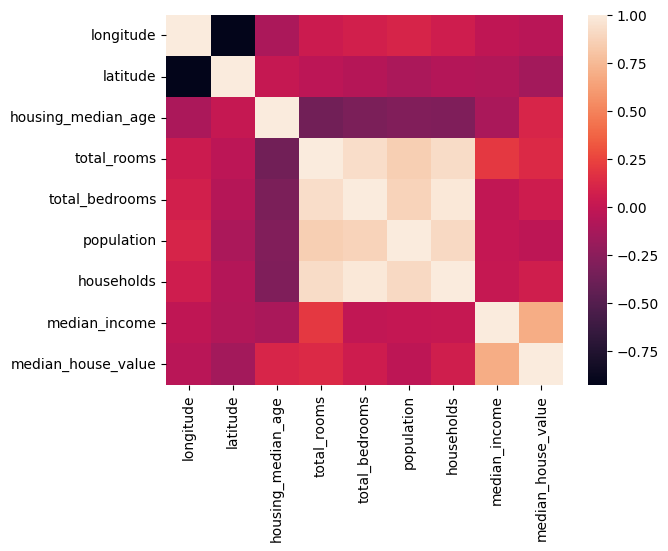

In [ ]:
sns.heatmap(corr_matrix)
plt.show()

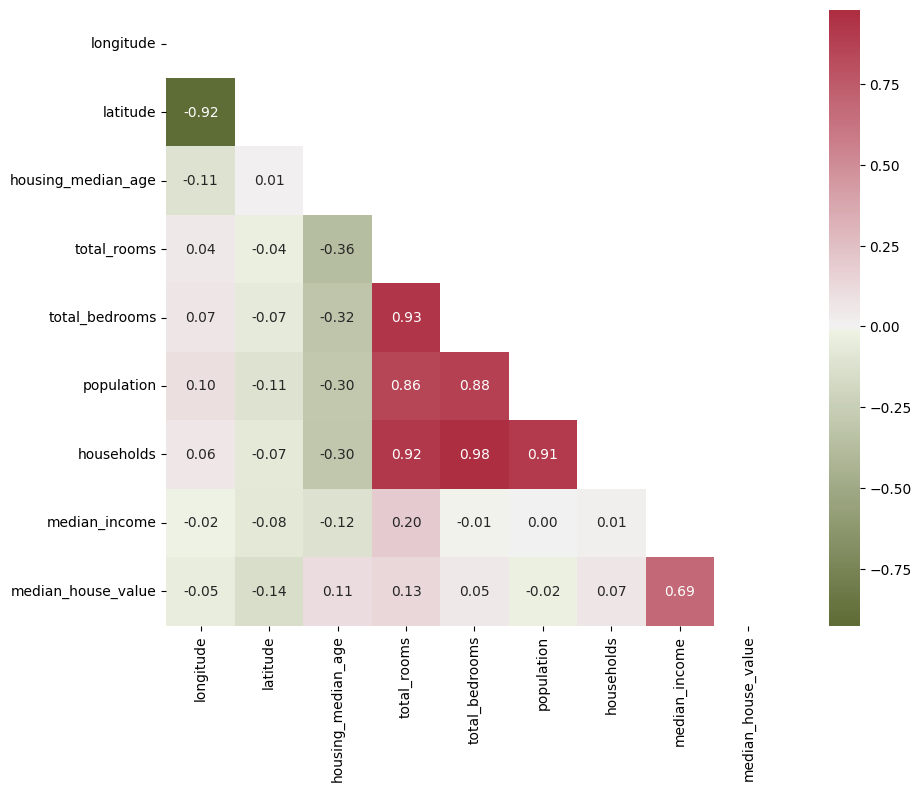

In [ ]:
# np.triu() crea un array con la parte triangular superior a True (máscara)

triangular_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))

# 100, 7: Define los dos extremos de la paleta, que diverge desde un color cerca del índice 100 hasta uno cerca del índice 7
# s=75, l=40: Controla la saturación y la luminosidad de los colores
# n=5: Números de colores que tendrá nuestra paleta
# center="light": Hace que las relaciones con menos relación (0) sean más claras y contra más intenso el color más relación tendrán.
# as_cmap=True: Indica que esta paleta sera usada como un colormap en el gráfico
new_cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)

# annot=True: Muestra los valores numéricos en cada celda de la gráfica
# square=True: Obliga a que cada celda del mapa sea cuadrada
sns.heatmap(corr_matrix, mask=triangular_mask, center=0, cmap=new_cmap, annot=True, fmt=".2f", square=True)

plt.show()

Hay datos muy correlacionados como `households` y `total_bedrooms`. Nos indica que podríamos prescindir de uno de estos dos campos

## Preparación de los datos

### Combinaciones de atributos (feature engineering)

In [ ]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


El número de habitaciones por distrito no dice mucho. Quizás sería más útil saber la media de habitaciones por vivienda.

Vamos a crear varios atributos nuevos en base a los que ya tenemos.

In [ ]:
# Habitaciones por vivienda

housing_df["rooms_per_household"] = housing_df["total_rooms"] / housing_df["households"]

In [ ]:
# Dormitorios por vivienda

housing_df["bedrooms_per_household"] = housing_df["total_bedrooms"] / housing_df["households"]

In [ ]:
# Habitantes por vivienda
housing_df["population_per_household"] = housing_df["population"] / housing_df["households"]

In [ ]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209


In [ ]:
attributes = ["rooms_per_household", "bedrooms_per_household", "population_per_household"]
housing_df[attributes].describe()

,rooms_per_household,bedrooms_per_household,population_per_household
count,20640.000000,20433.000000,20640.000000
mean,5.429000,1.097062,3.070655
std,2.474173,0.476104,10.386050
min,0.846154,0.333333,0.692308
25%,4.440716,1.006029,2.429741
50%,5.229129,1.048889,2.818116
75%,6.052381,1.099631,3.282261
max,141.909091,34.066667,1243.333333


Vemos de nuevo las correlaciones respecto al valor de las viviendas.

In [ ]:
new_corr_matrix = (housing_df.drop("ocean_proximity", axis=1)).corr()
new_corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650
longitude,-0.045967


Tenemos que decidir si nos quedamos con los nuevos atributos y borramos `total_rooms`, `total_bedrooms` y quizás también `population` o si borramos los nuevos atributos y nos quedamos como antes.

Tomamos la decisión de borrar los atributos nuevos y continuar con el dataset original.

In [ ]:
housing_df = housing_df.drop(attributes, axis=1)

### Gestión de nulos

La mayoría de los algoritmos de ML no trabajan bien cuando faltan datos.

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
incomplete_rows = housing_df[housing_df.total_bedrooms.isnull()]

incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


Tenemos tres opciones:

1. Quitar los distritos correspondientes (eliminar las filas que contienen nulos).
2. Quitar el atributo completo.
3. Rellenar con algún valor (la media, la mediana, ceros, unos, etc).


In [ ]:
# Opcion 1

housing_option1_df = housing_df.copy()

# Eliminar las filas de la columna total_bedrooms que tienen valores nulos
housing_option1_df.dropna(subset=["total_bedrooms"], inplace=True) # Lo que hace inplace es modificar el dataset, sino solo devolveria el resultado
housing_option1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
# Opcion 2
housing_option2_df = housing_df.copy()

# Elimina la columna total_bedrooms
housing_option2_df.drop("total_bedrooms", axis=1, inplace=True)
housing_option2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


In [ ]:
# Opcion 3
housing_option3_df = housing_df.copy()

# Calcular la mediana (el valor que se encuentra exactamente en el centro)
mediana = housing_option3_df["total_bedrooms"].median()

# Rellena los nulos con la mediana
housing_option3_df["total_bedrooms"] = housing_option3_df["total_bedrooms"].fillna(mediana)

housing_option3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Lo mejor sería continuar con las tres opciones por separado y ver cuál funciona mejor.

Ahora nos vamos decantar por la primera opción, eliminar las filas con nulls.

In [ ]:
housing_df.dropna(subset=["total_bedrooms"], inplace=True)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Conversión de categorías a números.

La mayoría de los algoritmos de ML trabajan mejor con números que con categorías.

La conversión es especialmente aconsejable cuando tenemos categorías del tipo "muy malo", "malo", "regular", "bueno", "muy bueno".

Vamos a convertir los valores de `ocean_proximity` en números.

In [ ]:
housing_df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
housing_df["ocean_proximity"] = housing_df["ocean_proximity"].replace \
 (["INLAND", "<1H OCEAN", "NEAR OCEAN", "NEAR BAY", "ISLAND"], [0., 1., 2., 3., 4.])
housing_df

<ipython-input-38-8bb81020138d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_df["ocean_proximity"] = housing_df["ocean_proximity"].replace \


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0


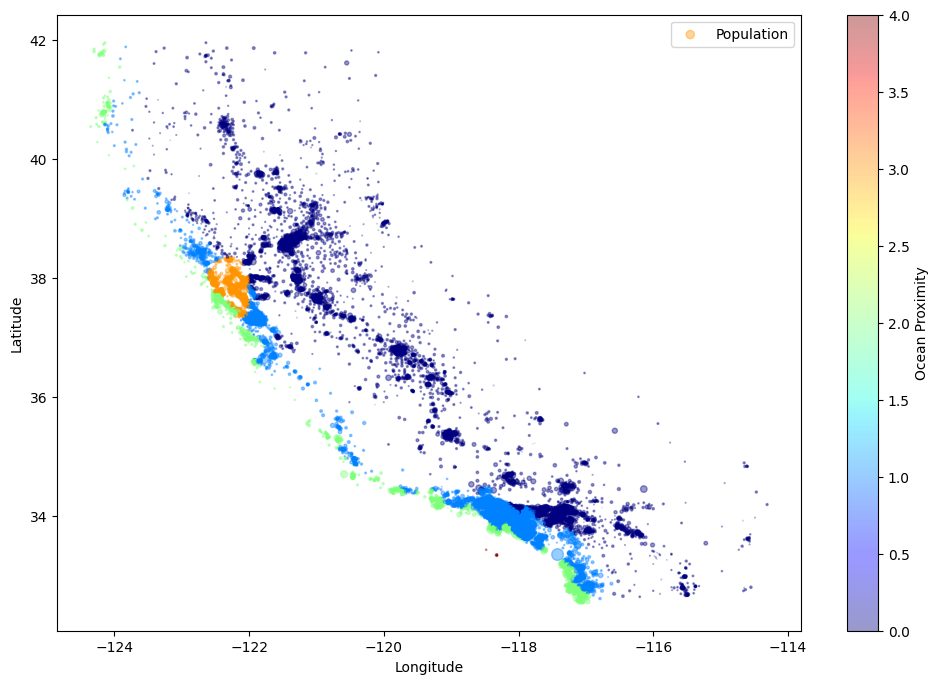

In [ ]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))

graphic = plt.scatter(x = housing_df["longitude"],
                      y=housing_df["latitude"],
                      alpha=0.4,
                      s=housing_df["population"] / 500,
                      label="Population",
                      c=housing_df["ocean_proximity"],
                      cmap="jet")

# Añadir nombres a los ejes
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Añadir la barra de colores formateada
color_bar = plt.colorbar(graphic)
color_bar.set_label("Ocean Proximity")

plt.legend()

plt.show()

### Mezcla de datos

Antes de trocear el dataset vamos a "barajarlo" para asegurarnos que no tenemos los datos agrupados por algún criterio.

El método `sample()` extrae una muestra aleatoria del dataframe.

In [ ]:
# Extrae una fila aleatoria

housing_df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6225,-117.93,34.05,32.0,3055.0,623.0,1902.0,565.0,4.2926,190700.0,1.0


In [ ]:
# Extrae la mitad del dataframe

housing_df.sample(frac=0.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3299,-122.62,38.95,19.0,2230.0,538.0,832.0,359.0,1.6865,58800.0,0.0
17392,-120.45,34.96,21.0,2121.0,445.0,2211.0,463.0,4.0603,117600.0,1.0
11985,-117.49,34.02,21.0,3736.0,738.0,2021.0,640.0,4.4545,142400.0,0.0
8064,-118.19,33.83,42.0,1773.0,360.0,815.0,299.0,4.9000,406300.0,2.0
1811,-122.32,37.92,28.0,4649.0,977.0,2606.0,953.0,3.2674,129100.0,3.0
...,...,...,...,...,...,...,...,...,...,...
16860,-122.43,37.63,15.0,2748.0,997.0,1447.0,901.0,3.5214,144200.0,2.0
2487,-120.35,36.16,18.0,1519.0,296.0,846.0,272.0,2.7792,85300.0,0.0
1213,-120.54,38.07,37.0,736.0,148.0,339.0,140.0,2.2875,79900.0,0.0
1938,-120.98,38.68,5.0,4810.0,909.0,2242.0,900.0,3.2964,176900.0,0.0


In [ ]:
# Baraja el dataframe

housing_df = housing_df.sample(frac=1)

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3177,-119.93,36.32,25.0,8363.0,1636.0,7679.0,1580.0,2.0285,106300.0,0.0
8872,-118.41,34.06,43.0,4994.0,1057.0,1830.0,969.0,5.5321,500001.0,1.0
8581,-118.41,33.89,31.0,702.0,161.0,236.0,144.0,5.0497,500001.0,1.0
7156,-118.15,34.04,44.0,647.0,142.0,457.0,143.0,3.6875,162500.0,1.0
17554,-121.88,37.33,35.0,3300.0,1154.0,3120.0,1075.0,1.4730,213600.0,1.0


## Separación de la matriz de características $X$ de los datos de salida $y$ (target)

In [ ]:
y = housing_df["median_house_value"]
y

,median_house_value
3177,106300.0
8872,500001.0
8581,500001.0
7156,162500.0
17554,213600.0
...,...
2004,75000.0
3512,218400.0
7837,144000.0
17434,146600.0


In [ ]:
X = housing_df.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3177,-119.93,36.32,25.0,8363.0,1636.0,7679.0,1580.0,2.0285,0.0
8872,-118.41,34.06,43.0,4994.0,1057.0,1830.0,969.0,5.5321,1.0
8581,-118.41,33.89,31.0,702.0,161.0,236.0,144.0,5.0497,1.0
7156,-118.15,34.04,44.0,647.0,142.0,457.0,143.0,3.6875,1.0
17554,-121.88,37.33,35.0,3300.0,1154.0,3120.0,1075.0,1.4730,1.0
...,...,...,...,...,...,...,...,...,...
2004,-119.79,36.74,52.0,173.0,87.0,401.0,84.0,2.1094,0.0
3512,-118.47,34.26,35.0,1898.0,344.0,1123.0,347.0,5.5792,1.0
7837,-118.16,33.91,6.0,3445.0,847.0,2467.0,712.0,3.1507,1.0
17434,-120.46,34.63,48.0,1408.0,301.0,682.0,279.0,2.9271,2.0


### Creación de los datos de entrenamiento y de prueba.

Separamos el dataset en dos partes:

* Datos de entrenamiento (training set) - 80%
* Datos de prueba (test set) - 20% (si tenemos muchos datos el porcentaje sería menor)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12419,-116.22,33.72,28.0,826.0,258.0,979.0,245.0,1.7172,0.0
9812,-121.93,36.60,33.0,3455.0,683.0,1704.0,663.0,4.0154,2.0
14066,-117.12,32.75,20.0,1406.0,413.0,850.0,412.0,2.3261,2.0
13132,-121.48,38.46,8.0,10505.0,1777.0,6002.0,1694.0,4.0516,0.0
1385,-122.11,37.99,10.0,2864.0,514.0,1300.0,507.0,4.3875,3.0
...,...,...,...,...,...,...,...,...,...
8045,-118.17,33.85,37.0,3714.0,708.0,1956.0,694.0,4.2218,1.0
18294,-122.10,37.39,35.0,2471.0,349.0,881.0,342.0,7.6229,3.0
11847,-120.66,39.72,15.0,3763.0,784.0,717.0,348.0,2.2019,0.0
590,-122.09,37.71,31.0,1843.0,282.0,749.0,269.0,5.2855,3.0


In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9445,-119.90,37.49,13.0,2230.0,443.0,920.0,361.0,3.0000,0.0
16433,-121.23,38.11,48.0,561.0,81.0,240.0,69.0,3.6312,0.0
18103,-122.04,37.30,25.0,2366.0,417.0,1076.0,398.0,6.9238,1.0
5009,-118.33,34.02,42.0,2043.0,378.0,869.0,416.0,3.5000,1.0
15520,-117.07,33.13,17.0,6817.0,1632.0,4526.0,1474.0,2.6152,1.0
...,...,...,...,...,...,...,...,...,...
14291,-117.13,32.73,52.0,2676.0,557.0,1181.0,537.0,3.6058,2.0
12186,-117.34,33.71,10.0,2591.0,486.0,1255.0,425.0,3.1513,1.0
2225,-119.84,36.81,18.0,2789.0,378.0,937.0,364.0,7.7062,0.0
7148,-118.13,34.03,42.0,2203.0,467.0,1470.0,488.0,2.8385,1.0


In [ ]:
y_train

,median_house_value
12419,58800.0
9812,225700.0
14066,114600.0
13132,121200.0
1385,287700.0
...,...
8045,200500.0
18294,500001.0
11847,130500.0
590,253500.0


In [ ]:
y_test

,median_house_value
9445,112000.0
16433,202800.0
18103,345900.0
5009,181100.0
15520,135300.0
...,...
14291,213100.0
12186,154300.0
2225,188300.0
7148,192200.0


Si todo es correcto, la distribución de los datos de entrenamiento y de test deben ser similares. Lo comprobaremos con un par de atributos.

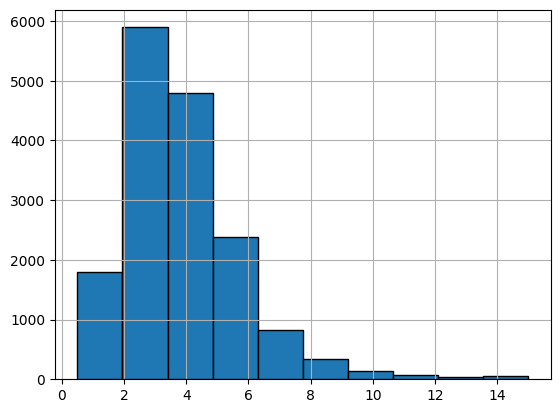

In [ ]:
X_train["median_income"].hist(edgecolor="black")
plt.show()

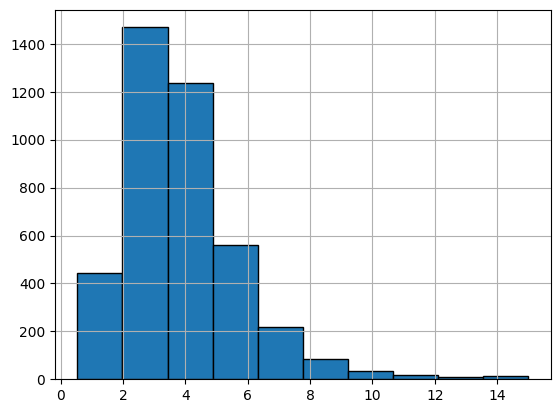

In [ ]:
X_test["median_income"].hist(edgecolor="black")
plt.show()

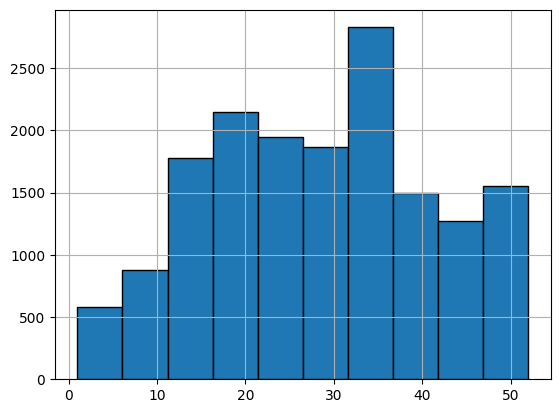

In [ ]:
X_train["housing_median_age"].hist(edgecolor="black")
plt.show()

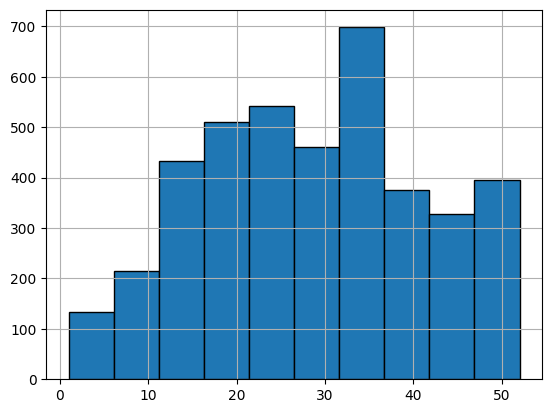

In [ ]:
X_test["housing_median_age"].hist(edgecolor="black")
plt.show()

## Entrenamiento del modelo

Se trata de un caso típico de regresión (buscamos un valor numérico).

Vamos a probar en primer lugar la regresión lineal (`LinearRegression`).

In [ ]:
from sklearn.linear_model import LinearRegression

housing_model = LinearRegression()

# Entrenamiento del modelo
housing_model.fit(X_train, y_train)

# Predicción con los datos de prueba
y_pred = housing_model.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real  |  Prec. estimado  |  Error absoluto")

for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}  |  {e:12.2f}    |{e_abs:16.2f}")

Prec. real  |  Prec. estimado  |  Error absoluto
 112000.00  |      95572.60    |        16427.40
 202800.00  |     168331.13    |        34468.87
 345900.00  |     349439.36    |         3539.36
 181100.00  |     224731.59    |        43631.59
 135300.00  |     161576.51    |        26276.51
 142100.00  |     162802.21    |        20702.21
 375000.00  |     255884.12    |       119115.88
  61300.00  |      71415.72    |        10115.72
 176600.00  |     178665.68    |         2065.68
  75500.00  |      87300.98    |        11800.98
 137500.00  |     219389.15    |        81889.15
 124700.00  |     155318.58    |        30618.58
 183400.00  |     207446.17    |        24046.17
  84600.00  |     192797.91    |       108197.91
  92400.00  |      91541.03    |          858.97
 266700.00  |     218017.66    |        48682.34
 245300.00  |     238729.21    |         6570.79
 154200.00  |     226615.94    |        72415.94
 260900.00  |     221808.40    |        39091.60
 500001.00  |     30

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred))
print("Raíz del error cuadrático medio: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# Coeficiente de determinación: 1 es la predicción perfecta
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  4712972436.516609
Raíz del error cuadrático medio:  68651.09202712371
Coeficiente de determinación:  0.643939097192874


Probaremos ahora con otros algoritmos.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

housing_model = DecisionTreeRegressor()

# Entrenamiento del modelo
housing_model.fit(X_train, y_train)

# Predicción con los datos de prueba
y_pred = housing_model.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real  |  Prec. estimado  |  Error absoluto")

for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}  |  {e:12.2f}    |{e_abs:16.2f}")

Prec. real  |  Prec. estimado  |  Error absoluto
 112000.00  |     147800.00    |        35800.00
 202800.00  |     158500.00    |        44300.00
 345900.00  |     351600.00    |         5700.00
 181100.00  |     182600.00    |         1500.00
 135300.00  |     142300.00    |         7000.00
 142100.00  |     134400.00    |         7700.00
 375000.00  |     446900.00    |        71900.00
  61300.00  |      59200.00    |         2100.00
 176600.00  |     163900.00    |        12700.00
  75500.00  |      84700.00    |         9200.00
 137500.00  |     158300.00    |        20800.00
 124700.00  |     128800.00    |         4100.00
 183400.00  |     144600.00    |        38800.00
  84600.00  |      89900.00    |         5300.00
  92400.00  |      93800.00    |         1400.00
 266700.00  |     250000.00    |        16700.00
 245300.00  |     221000.00    |        24300.00
 154200.00  |     161300.00    |         7100.00
 260900.00  |     228600.00    |        32300.00
 500001.00  |     27

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred))
print("Raíz del error cuadrático medio: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# Coeficiente de determinación: 1 es la predicción perfecta
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  4447855716.407879
Raíz del error cuadrático medio:  66692.2462990105
Coeficiente de determinación:  0.6639684311180579


In [ ]:
from sklearn.ensemble import RandomForestRegressor # Variante del arbol de decision

housing_model = RandomForestRegressor()

# Entrenamiento del modelo
housing_model.fit(X_train, y_train)

# Predicción con los datos de prueba
y_pred = housing_model.predict(X_test)

y_test_list = y_test.tolist()

print("Prec. real  |  Prec. estimado  |  Error absoluto")

for i in range(20):
  r = y_test_list[i]
  e = y_pred[i]
  e_abs = abs(r - e)
  print(f"{r:10.2f}  |  {e:12.2f}    |{e_abs:16.2f}")

Prec. real  |  Prec. estimado  |  Error absoluto
 112000.00  |     115767.00    |         3767.00
 202800.00  |     153571.00    |        49229.00
 345900.00  |     382013.12    |        36113.12
 181100.00  |     177263.00    |         3837.00
 135300.00  |     141833.00    |         6533.00
 142100.00  |     164660.00    |        22560.00
 375000.00  |     410323.02    |        35323.02
  61300.00  |      62099.00    |          799.00
 176600.00  |     148847.00    |        27753.00
  75500.00  |      74645.00    |          855.00
 137500.00  |     164514.00    |        27014.00
 124700.00  |     129128.00    |         4428.00
 183400.00  |     184162.00    |          762.00
  84600.00  |     113208.00    |        28608.00
  92400.00  |     123502.00    |        31102.00
 266700.00  |     328366.00    |        61666.00
 245300.00  |     216548.00    |        28752.00
 154200.00  |     180336.00    |        26136.00
 260900.00  |     225406.00    |        35494.00
 500001.00  |     37

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Error cuadrático medio: ", mean_squared_error(y_test, y_pred))
print("Raíz del error cuadrático medio: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# Coeficiente de determinación: 1 es la predicción perfecta
print("Coeficiente de determinación: ", r2_score(y_test, y_pred))

Error cuadrático medio:  2319970355.961952
Raíz del error cuadrático medio:  48166.070588765615
Coeficiente de determinación:  0.8247282897244945
